# Ecuación de Navier Stokes (ENS)

Nota: a este documento lo podremos ejecutar de manera dinámica si tienen instalado:

- Python 3.5 o más nuevo instalado.
- [Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html).
- [FEniCS](https://fenicsproject.org/).

La visualización del mismo es óptima utilizando Jupyter Notebook.

### Referencias
- Larson y Bengzon, The Finite Element Method: Theory, Implementation, and Practice.
- Capítulo 20 de Logg , Mardal y Wells, Automated Solution of Differential Equations by the Finite Element Method.
- Utilizamos el ejemplo del tutorial de FEniCS, [seguir enlace](https://fenicsproject.org/pub/tutorial/html/._ftut1009.html).


### 1) Introducción y Aplicaciones
Lo primero que debemos decir es que se trata de dos ecuaciones que se resuelven **juntas**:
- **Conservación de la cantidad de movimiento** 
y 
- **Conservación de la masa**

Se aplica a cualquier "sistema" fluido. Sistema caracterizado por fuerzas internas débiles de tal manera que su forma macroscópica (área, volumen y su relación) siempre es aquella que minimiza la energía total. Pensemos en un río (sometido a gradientes de energía potencial fluye = desnivel del terreno) o una gota de agua en el espacio (ausencia de gravedad) tenderá a ser una esféria perfecta. 

Si trabajamos a escalas donde se cumple la hipótesis del continuo, (puede definirse la densidad como un parámetro que caracteriza al sistema, y ésta no depende de la ventana de tiempo de observación ni del tamaño de la muestra observada), un fluido "fluye" buscando minimizar la energía. 

[<img src="hipotesis-continuo.png" width="400"/>](hipotesis-continuo.png)

Ejemplos:
* gases y plasmas: atmósfera (huracanes, vientos, isotermas), gases de combustión (escapes, toberas de cohetes, turbinas), movimiento de contaminantes en el aire (nubes, pluma de cenizas, etc.)
$\space$
[<img src="plasmaas.jpeg" width="400"/>](plasmaas.jpeg)
$\space$
$\space$
* Líquidos: ríos y aguas subterráneas (difusión de contaminantes, etc.), corrientes oceánicas, desagües, diseño de oleoductos, etc.
$\space$
$\space$
[<img src="lava.jpeg" width="400"/>](lava.jpeg)
$\space$
$\space$
* sólidos: flujo de glaciares, flujo de materia granular, avalanchas, etc.
$\space$
$\space$
[<img src="glaciares.jpeg" width="400"/>](glaciares.jpeg)
$\space$
$\space$
$\space$
$\space$

$$ \rho\frac{\partial\mathbf{u}}{\partial t}+ \rho \mathbf{u}\cdot \nabla u  =  \nabla \cdot\sigma(u,p)+f  $$

$\space$
$\space$
$\space$
$\space$

### 2) Ecuaciones de Navier-Stokes (ENS) 

Cuando se habla de las ecuaciones de ENS generalmente se hace referencia a **dos** ecuaciones

* Ecuación de conservación de cantidad de movimiento
* Ecuación de conservación de la masa

Este problema combina muchos de los desafíos de nuestros problemas previamente estudiados: dependencia del tiempo, no linealidad y variables con valores vectoriales, ejemplo obvio la velocidad $\mathbf{u}$=($u_x,u_y,u_z$). Expresada con una notación compacta, estas son la ENS:

$$\rho(\frac{\partial\mathbf{u}}{\partial t}+\mathbf{u}\cdot \nabla \mathbf{u} )= \mu \nabla^{2} \mathbf{u} -\nabla p + f \tag{1a}$$ 

$$\frac{\partial\mathbf{\rho}}{\partial t}+ \nabla  \cdot(\rho u ) + Q =  0 \tag{1b}$$

donde:

* $\mathbf{u}$ : velocidad del elemento de volumen fluido

* $t$ : tiempo

* $\mu$ : viscosidad del fluido, depende de la temperatura y, de las características del fluido en cuestión. Los fluidos pueden ser **Newtonianos**, son los fluidos comunes tales como agua, soluciones diluidas etc. y los **no-Newtonianos** donde aparecen los fluidos tixotrópicos, son fluidos viscosos (incluso sólido) pero que se vuelven líquidos al someterlos a algún esfuerzo (agitarlos) con más o menos fuerza, algunas pinturas. Fluidos reopécticos, su viscosidad depende de cuánto tiempo ha estado sometido a esfuerzo,algunos lubricantes, etc.

* $\rho$ : densidad del fluido 

* $p$ : presión

* $Q$ : de manera genérica fuentes y sumidero

Analicemos cada término: 

* $\rho\frac{\partial\mathbf{u}}{\partial t}$: aceleración

* $\mathbf{u}\cdot \nabla \mathbf{u}$: término convectivo, a veces también llamado advectivo.

* $ \mu \nabla^{2} \mathbf{u} $: término viscoso, disipación de la cantidad de movimiento debido a la fricción interna de los elementos de fluidos, aunque el origen de esa cantidad macroscópica observable es microscópica.

* $\nabla p$: gradiente de presiones internas en el fluido, que generan flujos.

* $f$ : resume las múltiples fuerzas externas que se le pueden aplicar al sistema, campo gravitatorio, campos eléctricos, etc.

Nota: A $\nabla^{2}$ lo pueden encontrar escrito como $\Delta$ y además si divido todo por $\rho$, queda:

$$\frac{\partial\mathbf{u}}{\partial t}+\mathbf{u}\cdot \nabla \mathbf{u} = \nu \nabla^{2} \mathbf{u} -\nabla p + f $$ 

siendo $\nu = \mu/\rho$ la viscosidad cinemática.

### 3) La ecuación de continuidad

 
$$\frac{\partial\mathbf{\rho}}{\partial t}+ \nabla  \cdot(\rho \mathbf{u} ) =  0 \tag{2}$$

Si no hay dependencia de la densidad con el tiempo, entonces: 

$$\nabla  \cdot(\rho \mathbf{u} ) =  0 \tag{3}$$

Si el fluido es incompresible

$$\rho  \nabla  \cdot \mathbf{u}  =  0 \tag{4}$$ 
dividiendo por $\rho$, entonces:

$$\nabla  \cdot \mathbf{u}  =  0 \tag{4}$$ 

$\space$
$\space$
[<img src="divergencia.png" width="400"/>](divergencia.png)
$\space$
$\space$

La Ec. (4) es la **ecuación de continuidad** para un fluido incompresible.

$$\frac{\partial u_{x}}{\partial x}+\frac{\partial u_{y}}{\partial y}+ \frac{\partial u_{z}}{\partial z} = 0 \tag{4}$$

### 4) Como la vamos a encontrar en FEniCS

Veamos como nos familiarizamos con la expresión en FEniCS

$$\rho(\frac{\partial\mathbf{u}}{\partial t}+\mathbf{u}\cdot \nabla \mathbf{u} )= \mu \Delta \mathbf{u} -\nabla p + f \tag{5}$$

Nótese que cambie $\nabla^{2}$ por $\Delta$ (laplaciano), para familiarizarnos con la notación de FEniCS.

Desarrollemos la ENS por componentes en coordenadas cartesianas $\left(x,y,z\right)$ con $\mathbf{u}=\left(u_{x},u_{y},u_{z}\right)$.

Obteniendo para  $x$ la siguiente ecuación:

$$\rho(\frac{\partial u_{x}}{\partial t} + u_{x} \frac{\partial u_{x}}{\partial{x}} + u_{y} \frac{\partial u_{x}}{\partial{y}}+ u_{z} \frac{\partial u_{x}}{\partial{z}})= \mu 
(\frac{\partial^{2} u_{x}}{\partial{x^{2}}}
+\frac{\partial^{2} u_{x}}{\partial{y^{2}}}
+\frac{\partial^{2} u_{x}}{\partial{z^{2}}}) -\frac{\partial p}{\partial{x}}
+ f_{x}\tag{5a}, $$

para  $y$: 

$$\rho(\frac{\partial u_{y}}{\partial t} + u_{x} \frac{\partial u_{y}}{\partial{x}} + u_{y} \frac{\partial u_{y}}{\partial{y}}+ u_{z} \frac{\partial u_{y}}{\partial{z}})=
\mu
(\frac{\partial^{2} u_{y}}{\partial{x^{2}}}
+\frac{\partial^{2} u_{y}}{\partial{y^{2}}}
+\frac{\partial^{2} u_{y}}{\partial{z^{2}}}) -\frac{\partial p}{\partial{y}}
+ f_{y} \tag{5b},$$

y por último para $z$: 

$$\rho(\frac{\partial u_{x}}{\partial t} + u_{x} \frac{\partial u_{z}}{\partial{x}} + u_{y} \frac{\partial u_{z}}{\partial{y}}+ u_{z} \frac{\partial u_{z}}{\partial{z}})= \mu 
(\frac{\partial^{2} u_{z}}{\partial{x^{2}}}
+\frac{\partial^{2} u_{z}}{\partial{y^{2}}}
+\frac{\partial^{2} u_{z}}{\partial{y^{2}}}) -\frac{\partial p}{\partial{z}}
+ f_{z} \tag{5c}.$$

En FEniCS y en muchos libros, la pueden encontrar escrita de manera compacta asi:

$$\rho(\frac{\partial\mathbf{u}}{\partial t}+ u \cdot \nabla \mathbf{u}  )=  \nabla \cdot\sigma(\mathbf{u},p)+f \tag{6}.$$

Observen la expresión:

$$\sigma(\mathbf{u},p)= 2 \mu \epsilon(\mathbf{u}) - p I \tag{7}$$

donde $\sigma(u,p)$ es el tensor de tensiones,$\mu$ es la viscosidad, y $\epsilon(u)$ tensor de velocidad de deformación definido como siempre:

$$\epsilon(\mathbf{u}) = \frac{1}{2}(\nabla \mathbf{u} + (\nabla \mathbf{u})^T) \tag{8}.$$

### 5) Formulación variacional de Ecuaciones de Navier-Stokes para un fluido newtoniano

Las ecuaciones son: 

$$ \rho\frac{\partial\mathbf{u}}{\partial t}+ \rho \mathbf{u}\cdot \nabla \mathbf{u}  =  \nabla \cdot\sigma(\mathbf{u},p)+f  \space\space\space en \space\space\space \Omega \tag{9} $$

$$\nabla  \cdot \mathbf{u}  =  0 \space  \space\space\space\space\space\space en \space\space\space \Omega \tag{10}$$

$$\mathbf{u}  = \mathbf{u_{0}}  \space\space\space\space\space\space en \space\space\space \partial\Omega \tag{11}$$

Recuerden $\Omega \subset R^{d} $ y $\partial\Omega \subset R^{d-1}$. Ejemplo, si d= 2 implicaría que estaríamos resolviendo las ecuaciones para un sistema $\left(x,y\right)$ y las condicines de borde se las estaríamos aplicando a una línea de ese sistema.

Notar que $ \mathbf{u}  = \mathbf{u_{0} = 0}$ indica que la velocidad contra la pared del tubo o canal vale cero, esta es una condición muy usada. Aunque si el fluido no moja la pared (imaginar superfice de teflon) esa velocidad no es nula, hay gran discucion en esos casos de cual sería el valor de la velocidad, a esa condición de deslizamiento se le llama "slipash" en la literatura.

¿Problema?

* no conocemos el campo de velocidades $\mathbf{u}$ 
* no conocemos $p$ 

Las ecuaciones de Navier-Stokes son diferentes de la ecuación de calor dependiente del tiempo. Si aplicamos la misma técnica que para la ecuación de calor; es decir, reemplazando la derivada en el tiempo con diferencias simple, obtenemos un sistema de ecuaciones no lineal. El inconveniente es que el sistema tiene una estructura denominada de **punto silla** (saddle point) y requiere técnicas especiales (precondicionadores especiales y métodos iterativos) para ser resuelto de manera eficiente.

En cambio, aplicaremos un enfoque más simple y a menudo muy eficiente, conocido como **método de división**. La idea es considerar las Ecs. (9) y (10) por separado. Aunque existen varias estrategias de división, usaremos una variante del método propuesto por *Chorin et. al. (Numerical solution of the Navier-Stokes equations, Math. Comp., 22, pp. 745-762, 1968)*. Es conocido como el esquema de **corrección de presión incremental (Incremental Pressure Correction Scheme IPCS)** debido a que:

* proporciona una precisión mejorada en comparación con el esquema original
* y además el costo adicional es mínimo (nos referimos al poder de cálculo).

### Notas: 
1) Importante: el metodo usa **dos** funciones de prueba: 
   - **$v$** es una funcion test o prueba pero al igual que $\mathbf{u}$ (la velocidad), $v$ es un vector.
   - $q$ es un función de prueba para la presión, al igual que la presion,  $q$ es un escalar.

2) usaremos una notación abreviada

$$ <m,n> = \int_{\Omega} m\space n \space dx$$


$$ <m,n>_{\partial\Omega} = \int_{\partial\Omega} m\space n \space ds$$

si $\Omega = R^{3}$ entonces $dx = dV$ siendo entonces $\partial\Omega = R^{2}$ entonces $ds = dA$

El esquema de corrección de presión incremental (Incremental Pressure Correction Scheme IPCS) consta de tres pasos que explicaremos a continuación: 

#### Paso (1)

Primero, calculamos una velocidad tentativa $ \mathbf{u}^{*}$ avanzando la ecuación de cantidad de movimiento, Ec. (9), $\rho\frac{\partial\mathbf{u}}{\partial t}+ \rho \mathbf{u}\cdot \nabla \mathbf{u}  =  \nabla \cdot\sigma\left(\mathbf{u},p\right)+f $ 

mediante un esquema de diferencia finita de punto medio en el tiempo, pero usando la presión $p^{n}$ del intervalo de tiempo anterior, es decir, el tiempo $t^{n}$. También linealizaremos el término convectivo no lineal usando la velocidad conocida $\mathbf{u}^{n}$ del paso de tiempo anterior, $u^{n}\cdot\nabla u^{n}$. El problema variacional para este primer paso es:

$$  \langle\frac{\rho(\mathbf{u}^{*}-\mathbf{u}^{n}}{\Delta t}),v\rangle +  \langle\rho(\mathbf{u}^{n}\cdot \nabla \mathbf{u}^{n},v\rangle + \langle\sigma(\mathbf{u}^{n+1/2}, p^{n}), \epsilon(v)\rangle+ \langle p^{n}n,v\rangle_{\partial\Omega} - \langle\mu \Delta \mathbf{u}^{n+1/2}\cdot n ,v\rangle_{\partial\Omega}= \langle  f^{n+1}, v\rangle \tag{paso 1}$$
 
Notar que $\mathbf{u}^{n+1/2} \approx (\mathbf{u}^{n} + \mathbf{u}^{n+1})/2$, además debe incluir las condiciones de borde para la velocidad.
 
 #### Paso (2)
 Con la ayuda de $\mathbf{u}^{*}$ calculamos $p^{n+1}$ de la siguiente manera:
 
 $$  \langle \nabla p^{n+1}, \nabla q\rangle =   \langle \nabla p^{n}, \nabla q\rangle - \langle \left(\nabla \cdot \mathbf{u}^{*}, q\right)/ \Delta t \rangle \tag{paso 2}$$
 
 recordemos que $q$ era la función de prueba para la presión. Acá también es importante y se deben incluir las condiciones de borde para la presión.
 
 #### Paso (3) 
Reemplazamos en la ecuación de conservación de momento, Ec. (9), $\mathbf{u}^{*}, p^{n}$  y la restamos a la resultante de reemplazar en la misma ecuación $\mathbf{u}^{n+1}, p^{n+1}$, el resultado es:
 
 $$\frac{\mathbf{u}^{n+1}- \mathbf{u}^{*}}{\Delta t} + \nabla p^{n+1} - \nabla p^{n} =0 \tag{paso 3}$$
 
De la ecuación del Paso (3) ¿qué conocemos y que desconocemos? Repasemos:

$ \mathbf{u}^{*} $ velocidad estimada en el Paso (1) $ p^{n} $ es conocida y $ p^{n+1} $ calculada en el Paso (2).
 
Ahora viene la parte dónde le exijo a la solución satisfacer la Ecuación de conservación de la masa, o sea la ecuación de continuidad, Ec. (10), $\nabla  \cdot \mathbf{u}^{n+1}  =  0 $, entonces:
 
 $$\frac{-\nabla \cdot \mathbf{u}^{*}}{\Delta t} + \nabla^{2} p^{n+1} - \nabla^{2} p^{n} =0 \tag{paso 3}$$
 
Recordems que $\mathbf{u}^{*}$ es conocida y que la presión es un escalar, entonces el paso (3) resulta en el problema de Poisson para la $p^{n+1}$, finalmente es posible entonces calcular $\mathbf{u}^{n+1}$ de la siguiente ecuación:
 
$$  \langle \mathbf{u}^{n+1}, v\rangle =  \langle \mathbf{u}^{*}, v\rangle - \Delta t \langle \nabla (p^{n+1}-p^{n}), v\rangle $$
 
Resumen: el método logra resolver eficientemente las Ecuaciones de Navier-Stokes para un fluido incompresible resolviendo tres problemas variacionales lineales en cada paso de tiempo, uno para la velocidad, otro para la presión y la ecuación de continuidad que hace que se cumplan efectivamente las dos ecuaciones de balance: **la conservación de la cantidad de movimiento y la conservación de la masa**. 

## Importante

Cuando se aplican las ENS a algún problema siempre se trabaja con la ecuación adimensionalizada. Para ello se toman dimensiones y variables que caractericen al sistema/problema en cuestión, ejemplo de dimensiones caraterísticas: $R$ **radio del tubo**,alguna **velocidad** $U$ puede ser la máxima, y la velocidad a distancia infinita, etc.

Esto da lugar a la aparición de números adimensionales. El más conocido es el número de Reynolds que vincula en la ecuación de conservación de movimiento al término viscoso con el convectivo:

$$ Re = \frac{\rho v R }{\mu}$$
 
Si este número es grande dominan las fuerzas inerciales (flujo turbulento) y si es pequeño dominan las fuerzas viscosas.
 
La densidad y la viscosidad no se adimensionalizan pero la presión si, si $p^{*} = \frac{p}{U^{2} \rho}$ (donde $U$ es alguna velocidad característica de entrada del fluido):
 
$$\frac{\partial\mathbf{u*}}{\partial t*}+  \mathbf{u*}\cdot \nabla \mathbf{u*} = \frac{1}{Re}\space\nabla^{2} \mathbf{u*} -\nabla p*\tag{12}$$ 
 
Pero si $p^{*} = p \frac{R}{\mu U}$

$$ Re\space(\frac{\partial\mathbf{u*}}{\partial t*}+\space \mathbf{u*}\cdot \nabla \mathbf{u*}) = \nabla^{2} \mathbf{u*} -\nabla p*\tag{12}$$ 

Los números adimensionales son de una importancia superlativa en el tecnología, ya que dan lugar a un campo del diseño que se llama diseño en condicines de similitud. 

Dado dos sistemas de diferentes escalas, si tienen los mismos números adimensinales relevantes se puede asegurar que los sistemas se comportarán igual. Esto permite probar un puente colgante o el perfil del ala de un avión en un túnel de viento de dimensiones mucho más pequeñas.

### 6) Ejemplo

Comentaremos un ejemplo simple de un fluido incompresible utilizando Navier-Stokes para un canal en dos dimensiones ([ley de Poisseuille](https://es.wikipedia.org/wiki/Ley_de_Poiseuille)). El esquema numérico que utilizaremos es el Incremental Pressure Correction Scheme (IPCS). Todo está subido al ejemplo20.py en la carpeta de ejemplos. Es el ejemplo del tutorial de FEniCS que pueden también ver en este [enlace](https://fenicsproject.org/pub/tutorial/html/._ftut1009.html).

El resultado se comparará con el resultado teórico:

$$u_{r} = \frac{\Delta p}{4L\mu}\left(R^{2}-r^{2}\right) $$

Aquí $L=1$, $\mu=1$, y $\Delta p = 8.0$. Noten que $R=\frac{1}{2}$. En este caso, debemos cambiar el sistema de referencia porque la malla la hacemos desde $x=0$ a $x=1$ y  $y=0$ a $y=1$. Entonces la solución analítica nos da:

$$u_{y}=4y\left(1-y\right)$$

Primero importamos todos lo necesario y definimos algunos parámetros:

In [42]:
from __future__ import print_function
from fenics import *
import numpy as np
import matplotlib.pyplot as plt


T = 10.0           # tiempo final
num_steps = 500    # número de pasos
dt = T / num_steps # paso de tiempo
mu = 1          # viscosidad
rho = 1           # densidad

Luego, creamos la malla y las funciones de prueba $v$ y $p$ (recordemos que la primera es un vector y la presión es un escalar).

In [43]:
mesh = UnitSquareMesh(16, 16)
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)


Noten la forma de definir las condiciones de borde. Es diferente a como lo veníamos haciendo, simplemente definimos un string que debe contener funciones de c++ y la función DirichletBC de FEniCS ya lo comprende. Definimos: presión fija de $p=8$ a la izquierda y $p=0$ a la derecha, velocidad nula $\mathbf{u}=\left(0,0\right)$ en los muros, tanto arriba como abajo.

In [44]:
inflow  = 'near(x[0], 0)'#región de presión en la entrada
outflow = 'near(x[0], 1)'#región de presión en la salida
walls   = 'near(x[1], 0) || near(x[1], 1)'#región de velocidad en las paredes

bcu_noslip  = DirichletBC(V, Constant((0, 0)), walls)#velocidad en las paredes
bcp_inflow  = DirichletBC(Q, Constant(8.0), inflow)#presión en la entrada
bcp_outflow = DirichletBC(Q, Constant(0), outflow)#presión en la salida
bcu = [bcu_noslip]
bcp = [bcp_inflow, bcp_outflow]

Defino las funciones test y trial, tanto para las incógnitas como para las variables auxiliares intermedias para hacer los pasos de 1 a 3 mencionados para el esquema IPCS. Lo que significa que debemos resolver tres formulaciones variacionales, una para cada paso.

In [45]:
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Defino las funciones test y trial para los pasos de tiempo
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

Defino las expresiones necesarias: $\mathbf{u}^{n+1/2}$, el vector normal a la malla, y el resto...

In [46]:
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Defino las funciones test y trial para los pasos de tiempo
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

# Defino algunas expresiones
U   = 0.5*(u_n + u)
n   = FacetNormal(mesh)
f   = Constant((0, 0))
k   = Constant(dt)
mu  = Constant(mu)
rho = Constant(rho)

# Tensor de deformación
def epsilon(u):
    return sym(nabla_grad(u))

# Tensor de esfuerzo
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))



Ahora si, las formulaciones variacionales para cada paso (Ecs. paso 1, paso 2, y paso 3):

In [47]:
# Paso (1) de la formulación variacional
F1 = rho*dot((u - u_n) / k, v)*dx + \
     rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Paso (2) de la formulación variacional
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

# Paso (3) de la formulación variacional
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

Luego, ensamblamos todo. Es decir, creamos las matrices y les imponemos las condiciones de contorno.

In [48]:
# Junto las matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Aplico las condiciones de borde a las matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

[None, None]

y finalmente resolvemos los pasos de tiempo:

In [49]:
# Resuelvo los pasos de tiempo
t = 0
for n in range(num_steps):

    # Actualizo el tiempo
    t += dt

    # Paso (1): velocidad tentativa
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1)

    # Paso (2): Corrección de la presión
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2)

    # Paso (3): Corrección de la velocidad
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3)
    
    # Calculo el error
    u_e = Expression(('4*x[1]*(1.0 - x[1])', '0'), degree=2)
    u_e = interpolate(u_e, V)
    error = np.abs(u_e.vector().get_local() - u_.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    print('max u:', u_.vector().get_local().max())

    # Actualizo la solución anterior
    u_n.assign(u_)
    p_n.assign(p_)
    


t = 0.02: error = 0.84
max u: 0.16000000000000342
t = 0.04: error = 0.684
max u: 0.31568816144455875
t = 0.06: error = 0.548
max u: 0.45196701833303393
t = 0.08: error = 0.444
max u: 0.5559329370127628
t = 0.10: error = 0.365
max u: 0.6348216978885606
t = 0.12: error = 0.3
max u: 0.7004586647377167
t = 0.14: error = 0.246
max u: 0.754470057841082
t = 0.16: error = 0.202
max u: 0.7984010777240691
t = 0.18: error = 0.165
max u: 0.8347367548032284
t = 0.20: error = 0.136
max u: 0.864370379847623
t = 0.22: error = 0.111
max u: 0.8887571330649249
t = 0.24: error = 0.0913
max u: 0.908746179289391
t = 0.26: error = 0.0749
max u: 0.9251289439389165
t = 0.28: error = 0.0614
max u: 0.9385959080817934
t = 0.30: error = 0.0504
max u: 0.9496145471152563
t = 0.32: error = 0.0413
max u: 0.958678413638838
t = 0.34: error = 0.0339
max u: 0.9660952072888659
t = 0.36: error = 0.0278
max u: 0.9721919158198927
t = 0.38: error = 0.0228
max u: 0.9771864377335554
t = 0.40: error = 0.0187
max u: 0.981286118545

t = 3.50: error = 4.42e-05
max u: 1.0000038222096763
t = 3.52: error = 4.37e-05
max u: 1.0000014251616662
t = 3.54: error = 4.31e-05
max u: 1.0000037750505324
t = 3.56: error = 4.26e-05
max u: 1.0000014012373595
t = 3.58: error = 4.2e-05
max u: 1.000003728154339
t = 3.60: error = 4.15e-05
max u: 1.0000013775966883
t = 3.62: error = 4.09e-05
max u: 1.0000036815271733
t = 3.64: error = 4.05e-05
max u: 1.0000013542384358
t = 3.66: error = 3.99e-05
max u: 1.0000036351748296
t = 3.68: error = 3.95e-05
max u: 1.0000013311613132
t = 3.70: error = 3.89e-05
max u: 1.0000035891028325
t = 3.72: error = 3.85e-05
max u: 1.0000013083639583
t = 3.74: error = 3.8e-05
max u: 1.0000035433164474
t = 3.76: error = 3.76e-05
max u: 1.0000012858449454
t = 3.78: error = 3.7e-05
max u: 1.0000034978206824
t = 3.80: error = 3.67e-05
max u: 1.000001263602788
t = 3.82: error = 3.61e-05
max u: 1.000003452620308
t = 3.84: error = 3.58e-05
max u: 1.0000012416359436
t = 3.86: error = 3.53e-05
max u: 1.0000034077198552

t = 6.74: error = 9.43e-06
max u: 1.0000010584101915
t = 6.76: error = 9.38e-06
max u: 1.0000005255642128
t = 6.78: error = 9.29e-06
max u: 1.0000010375549462
t = 6.80: error = 9.25e-06
max u: 1.000000523555625
t = 6.82: error = 9.17e-06
max u: 1.0000010169784352
t = 6.84: error = 9.12e-06
max u: 1.0000005215309677
t = 6.86: error = 9.04e-06
max u: 1.0000009966782588
t = 6.88: error = 9e-06
max u: 1.0000005194907367
t = 6.90: error = 8.91e-06
max u: 1.0000009766520082
t = 6.92: error = 8.87e-06
max u: 1.0000005174354187
t = 6.94: error = 8.79e-06
max u: 1.0000009568972663
t = 6.96: error = 8.75e-06
max u: 1.0000005153654976
t = 6.98: error = 8.67e-06
max u: 1.0000009374116092
t = 7.00: error = 8.63e-06
max u: 1.0000005132814507
t = 7.02: error = 8.55e-06
max u: 1.0000009181926037
t = 7.04: error = 8.51e-06
max u: 1.0000005111837516
t = 7.06: error = 8.44e-06
max u: 1.0000008992378153
t = 7.08: error = 8.4e-06
max u: 1.000000509072863
t = 7.10: error = 8.32e-06
max u: 1.0000008805448029

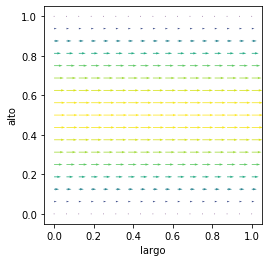

In [39]:
plt.xlabel('largo')
plt.ylabel('alto')
plot(u_)
plt.show()

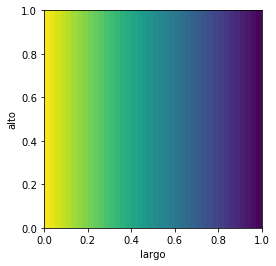

In [53]:
plt.xlabel('largo')
plt.ylabel('alto')
plot(p_)
plt.show()
